In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import f1_score, classification_report

# 1. Lire le fichier CSV
data = pd.read_csv('segment_activities_finale.csv')  # Remplace par ton chemin si besoin

# 2. Supprimer la classe "No Activity"
data = data[data['dominant_activity'] != 'No Activity']

# 3. Séparer les features (X) et les labels (y)
X = data.drop(columns=['dominant_activity'])
y = data['dominant_activity']

# 4. Diviser le jeu de données en 80% train + 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Créer le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 6. Validation croisée (sur l’ensemble d'entraînement uniquement)
y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)

# 7. Évaluer la performance sur le jeu de validation croisée
print("Résultats sur le jeu d'entraînement (avec validation croisée) :")
print("F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_train, y_train_pred, average='weighted'))
print("\nRapport détaillé :\n", classification_report(y_train, y_train_pred))

# 8. Entraîner sur tout le jeu d'entraînement
model.fit(X_train, y_train)

# 9. Tester sur les 20% restants
y_test_pred = model.predict(X_test)

# 10. Évaluer la performance sur le jeu de test
print("\n\nRésultats sur le jeu de test (20%) :")
print("F1 Score (macro):", f1_score(y_test, y_test_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_test, y_test_pred, average='weighted'))
print("\nRapport détaillé :\n", classification_report(y_test, y_test_pred))


Résultats sur le jeu d'entraînement (avec validation croisée) :
F1 Score (macro): 0.8214678763513931
F1 Score (weighted): 0.8557703425457024

Rapport détaillé :
                          precision    recall  f1-score   support

          Bed_to_Toilet       0.84      0.84      0.84      1103
                 Chores       0.84      0.85      0.84     12536
          Desk_Activity       0.89      0.90      0.89      2022
     Dining_Rm_Activity       0.73      0.62      0.67      2731
               Eve_Meds       0.86      0.87      0.87       571
         Guest_Bathroom       0.86      0.88      0.87      1198
       Kitchen_Activity       0.92      0.95      0.93      9557
             Leave_Home       0.86      0.83      0.85      2798
Master_Bedroom_Activity       0.77      0.78      0.77      2090
               Meditate       0.88      0.68      0.77       180
           Morning_Meds       0.92      0.95      0.94      1622
                   Read       0.81      0.44      0.57   

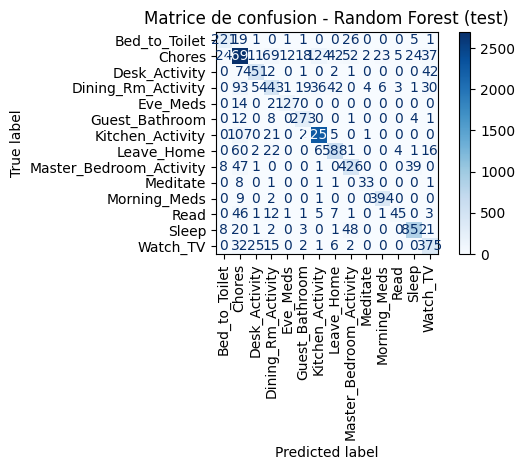

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 11. Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)

# 12. Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical', values_format='d')
plt.title("Matrice de confusion - Random Forest (test)")
plt.tight_layout()  # pour éviter que les labels se coupent
plt.show()


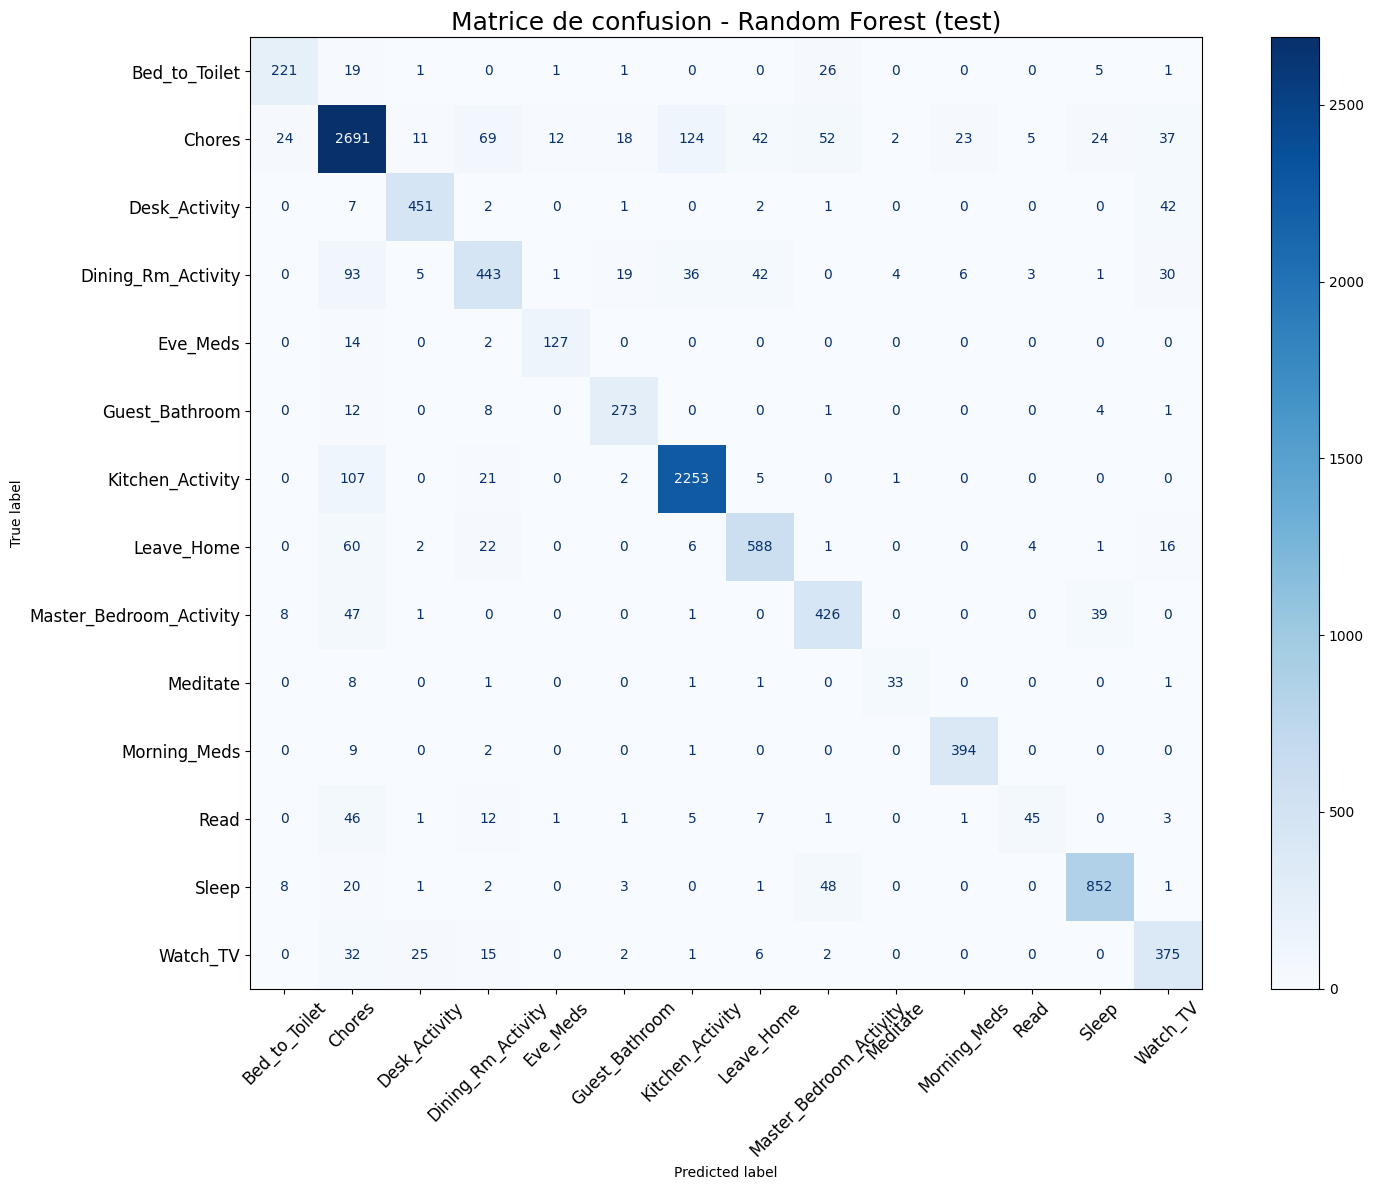

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)

# Taille plus grande
fig, ax = plt.subplots(figsize=(16, 12))  # Agrandit la figure

# Affichage avec options lisibles
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45, values_format='d')

# Titres et ajustements
plt.title("Matrice de confusion - Random Forest (test)", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import f1_score, classification_report

# 1. Lire le fichier CSV
data = pd.read_csv('segment_activities_finale.csv')  # Remplace par ton chemin si besoin

# 2. Supprimer la classe "No Activity"
data = data[data['dominant_activity'] != 'No Activity']

# 3. Séparer les features (X) et les labels (y)
X = data.drop(columns=['dominant_activity'])
y = data['dominant_activity']

# 4. Diviser le jeu de données en 80% train + 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Créer le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 6. Validation croisée (sur l’ensemble d'entraînement uniquement)
y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)

# 7. Évaluer la performance sur le jeu de validation croisée
print("Résultats sur le jeu d'entraînement (avec validation croisée) :")
print("F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_train, y_train_pred, average='weighted'))
print("\nRapport détaillé :\n", classification_report(y_train, y_train_pred))

# 8. Entraîner sur tout le jeu d'entraînement
model.fit(X_train, y_train)

# 9. Tester sur les 20% restants
y_test_pred = model.predict(X_test)

# 10. Évaluer la performance sur le jeu de test
print("\n\nRésultats sur le jeu de test (20%) :")
print("F1 Score (macro):", f1_score(y_test, y_test_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_test, y_test_pred, average='weighted'))
print("\nRapport détaillé :\n", classification_report(y_test, y_test_pred))




test_data = X_test.copy()
test_data['dominant_activity'] = y_test
test_data.to_csv('test_data_20_percent.csv', index=False)

Résultats sur le jeu d'entraînement (avec validation croisée) :
F1 Score (macro): 0.8214678763513931
F1 Score (weighted): 0.8557703425457024

Rapport détaillé :
                          precision    recall  f1-score   support

          Bed_to_Toilet       0.84      0.84      0.84      1103
                 Chores       0.84      0.85      0.84     12536
          Desk_Activity       0.89      0.90      0.89      2022
     Dining_Rm_Activity       0.73      0.62      0.67      2731
               Eve_Meds       0.86      0.87      0.87       571
         Guest_Bathroom       0.86      0.88      0.87      1198
       Kitchen_Activity       0.92      0.95      0.93      9557
             Leave_Home       0.86      0.83      0.85      2798
Master_Bedroom_Activity       0.77      0.78      0.77      2090
               Meditate       0.88      0.68      0.77       180
           Morning_Meds       0.92      0.95      0.94      1622
                   Read       0.81      0.44      0.57   